# WeatherPy

## Starter Code to Generate Random Geographic Coordindates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st
import numpy.ma.mrecords as mrecords

### Generate the Cities List by Using the CitiPy Library

In [4]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variable and Latitude

In [6]:
# URL for GET requests to retrieve city data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List for holding reponse information
city_name = []
city_lat = []
city_lng = []
city_max_temp = [] 
city_humidity = []
city_clouds = [] 
city_wind = []
city_country =[] 
city_date = []

# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-------------------------------------")

count = 0
set = 1

for index, city in enumerate(cities):
    count = count + 1

    # To avoid api call rate limits, get city weather data in sets of 50 cities,
    # with 5 seconds sleep time, and then continue
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)

    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_wind.append(response['wind']['speed'])
        city_date.append(response['dt'])
        city_country.append(response['sys']['country'])
        city_clouds.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")

print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | axim
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | glodeni
Processing Record 5 of Set 1 | kualakapuas
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | shingu
Processing Record 8 of Set 1 | shiyan
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | clovis
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | uvira
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | leninskoye
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ekhabi
Processing Record 20 of Set 1 | tifton
Processing Record 21 of Set 1 | saint george
Processing Record 22 of S

In [7]:
# Checking if we got responses
len(city_lat) 

563

In [8]:
# Convert weather data into DataFrame
city_data_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": city_date,
                                "Lat": city_lat,
                                "Lng": city_lng,
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                })
# Show record ount
city_data_df.count()

City          563
Country       563
Date          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
dtype: int64

In [9]:
# Sample data check
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,George Town,MY,1667878666,5.4112,100.3354,87.73,74,20,5.75
1,Esim,GH,1667878578,4.8699,-2.2405,77.40,86,82,2.62
2,Bengkulu,ID,1667878786,-3.8004,102.2655,80.83,74,100,3.53
3,Glodeni,MD,1667878787,47.7708,27.5144,46.69,70,100,3.51
4,Kualakapuas,ID,1667878787,-3.0091,114.3876,86.07,66,98,4.81


In [10]:
# Export the city data into a .csv file.
city_data_df.to_csv("output_data/cities.csv", index=True, index_label="City ID", header=True)

# Display the DataFrame
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,George Town,MY,1667878666,5.4112,100.3354,87.73,74,20,5.75
1,Esim,GH,1667878578,4.8699,-2.2405,77.40,86,82,2.62
2,Bengkulu,ID,1667878786,-3.8004,102.2655,80.83,74,100,3.53
3,Glodeni,MD,1667878787,47.7708,27.5144,46.69,70,100,3.51
4,Kualakapuas,ID,1667878787,-3.0091,114.3876,86.07,66,98,4.81
...,...,...,...,...,...,...,...,...,...
558,Ipixuna,BR,1667878996,-1.7625,-48.8043,73.29,96,100,2.24
559,Altay,CN,1667878903,47.8667,88.1167,47.05,37,90,2.84
560,Hofn,IS,1667878996,64.2539,-15.2082,43.00,91,100,25.34
561,Mweka,CD,1667878996,-4.8500,21.5667,65.39,94,100,1.03


## Create the Scatter Plots Requested

### Latitude vs. Temperature

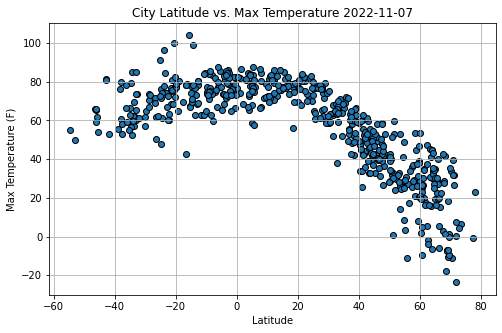

In [11]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Add current date
date_now = datetime.date(datetime.now())

fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values, edgecolor="black", marker="o")
plt.title(f"City Latitude vs. Max Temperature {date_now}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1_Latitude_Temperature.png")

# Show plot
plt.show()

### Latitude vs. Humidity

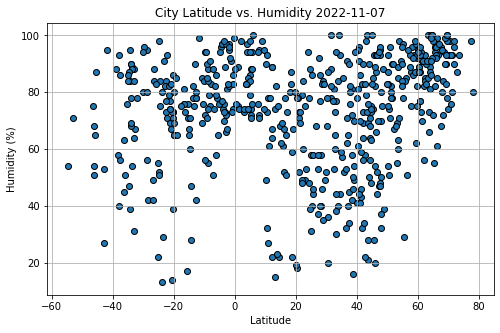

In [12]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
date_now = datetime.date(datetime.now())

fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values, edgecolor="black", marker="o")
plt.title(f"City Latitude vs. Humidity {date_now}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2_Latitude_Humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness

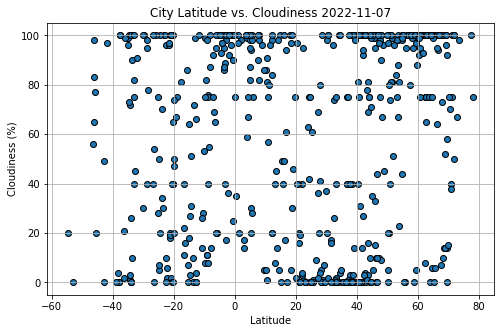

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
date_now = datetime.date(datetime.now())

fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values, edgecolor="black", marker="o")
plt.title(f"City Latitude vs. Cloudiness {date_now}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3_Latitude_Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

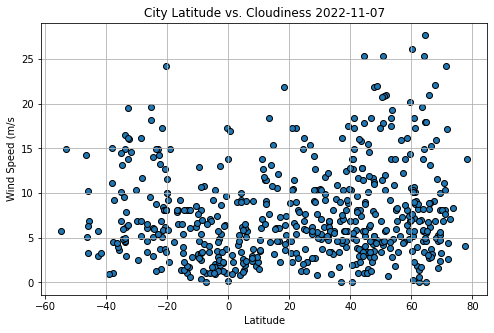

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
date_now = datetime.date(datetime.now())

fig1, ax1 = plt.subplots(figsize=(8,5))
plt.scatter(x_values, y_values, edgecolor="black", marker="o")
plt.title(f"City Latitude vs. Cloudiness {date_now}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4_Latitude_WindSpeed.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [15]:
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,George Town,MY,1667878666,5.4112,100.3354,87.73,74,20,5.75
1,Esim,GH,1667878578,4.8699,-2.2405,77.40,86,82,2.62
3,Glodeni,MD,1667878787,47.7708,27.5144,46.69,70,100,3.51
6,Shingū,JP,1667878787,33.7333,135.9833,68.95,40,0,0.96
7,Shiyan,CN,1667878788,32.6475,110.7781,65.57,53,26,5.21


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:] 

# Display sample data
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bengkulu,ID,1667878786,-3.8004,102.2655,80.83,74,100,3.53
4,Kualakapuas,ID,1667878787,-3.0091,114.3876,86.07,66,98,4.81
5,Port Alfred,ZA,1667878742,-33.5906,26.8910,62.19,89,100,3.00
8,Ushuaia,AR,1667878713,-54.8000,-68.3000,55.02,54,20,5.75
11,Uvira,CD,1667878788,-3.4067,29.1458,71.78,76,95,2.86


### Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8706646570036148
y = -1.08x + 92.89


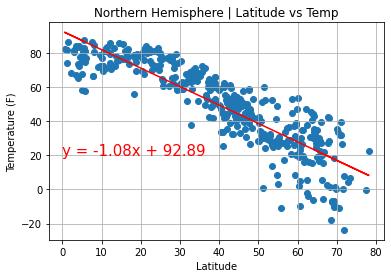

In [18]:
# Northern Hempishphere regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regEQplotX = 0
regEQplotY = 20

y_label = "Temperature (F)"
plt.title(f'Northern Hemisphere | Latitude vs Temp')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'output_data/Fig5_NH_Temp_Regression.png')
plt.show()

The r-square is 0.4666667303658809
y = 0.36x + 79.18


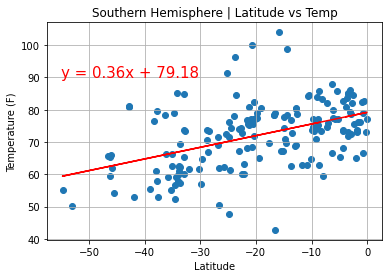

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regEQplotX = -55
regEQplotY = 90

y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere | Latitude vs Temp')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'output_data/Fig6_HS_Temp_Regression.png')
plt.show()

There is a strong correlation between the distance a city is from the equator and the maximum temperature of the city.
The closer to the equator, the warmer the temperature.
This is the result that you would anticipate to see. 

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.2858133906099197
y = 0.3x + 61.54


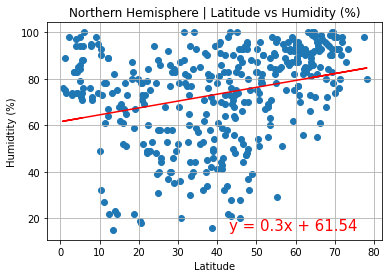

In [20]:
# Northern Hemispherebetweem
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regEQplotX = 43
regEQplotY = 15

y_label = "Humidtity (%)"
plt.title(f'Northern Hemisphere | Latitude vs Humidity (%)')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'output_data/Fig7_NH_Humidity_Regression.png')
plt.show()

The r-square is 0.26727127072160917
y = 0.37x + 80.53


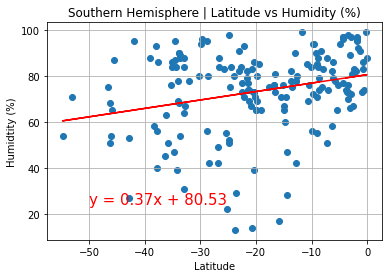

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regEQplotX = -50
regEQplotY = 24

y_label = "Humidtity (%)"
plt.title(f'Southern Hemisphere | Latitude vs Humidity (%)')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'output_data/Fig8_SH_Humidity_Regression.png')
plt.show()

When looking at the humidity percent compared to the distance from the equator, there is no correlation betwen humidity and latitude of the cities. 
This correlation surprised me because it was not what i was anticipating. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.22322469758158628
y = 0.46x + 40.53


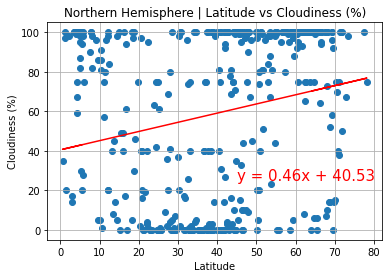

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regEQplotX = 45
regEQplotY = 25

y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere | Latitude vs Cloudiness (%)')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'output_data/Fig9_NH_Cloudiness_Regression.png')
plt.show()

The r-square is 0.2130208454304208
y = 0.62x + 69.37


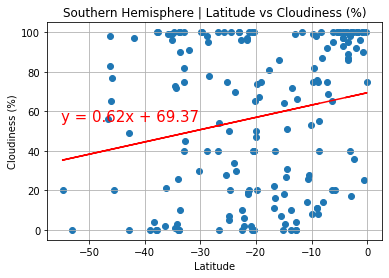

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regEQplotX = -55
regEQplotY = 55

y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere | Latitude vs Cloudiness (%)')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'output_data/Fig10_SH_Cloudiness_Regression.png')
plt.show()

When looking at how cloudy it is, there is not a strong correlation betwen cloudiness percent and distance from the equator. 


### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.17760113837402283
y = 0.05x + 5.94


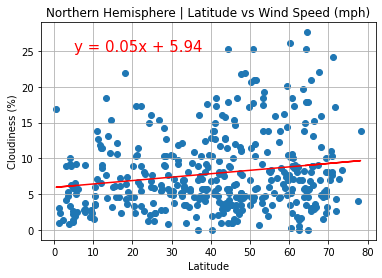

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regEQplotX = 5
regEQplotY = 25

y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere | Latitude vs Wind Speed (mph)')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'output_data/Fig11_NH_Wind_Regression.png')
plt.show()

The r-square is -0.2838792497635431
y = -0.1x + 4.91


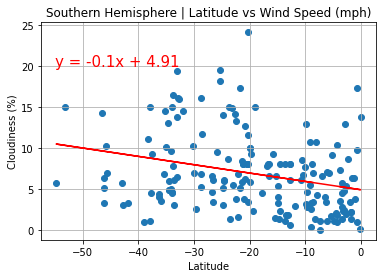

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regEQplotX = -55
regEQplotY = 20

y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere | Latitude vs Wind Speed (mph)')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

plt.savefig(f'output_data/Fig12_SH_Wind_Regression.png')
plt.show()

When looking at wind speed verses latitude, there does not appear to be a correlation between the two. 